# Multiple stationary bodies

In [1]:
using ViscousFlow

In [2]:
using Plots
pyplot()
default(grid = false)

LoadError: InitError: PyError (PyImport_ImportModule

The Python package matplotlib could not be imported by pyimport. Usually this means
that you did not install matplotlib in the Python version being used by PyCall.

PyCall is currently configured to use the Python version at:

/usr/bin/python3

and you should use whatever mechanism you usually use (apt-get, pip, conda,
etcetera) to install the Python package containing the matplotlib module.

One alternative is to re-configure PyCall to use a different Python
version on your system: set ENV["PYTHON"] to the path/name of the python
executable you want to use, run Pkg.build("PyCall"), and re-launch Julia.

Another alternative is to configure PyCall to use a Julia-specific Python
distribution via the Conda.jl package (which installs a private Anaconda
Python distribution), which has the advantage that packages can be installed
and kept up-to-date via Julia.  As explained in the PyCall documentation,
set ENV["PYTHON"]="", run Pkg.build("PyCall"), and re-launch Julia. Then,
To install the matplotlib module, you can use `pyimport_conda("matplotlib", PKG)`,
where PKG is the Anaconda package the contains the module matplotlib,
or alternatively you can use the Conda package directly (via
`using Conda` followed by `Conda.add` etcetera).

) <class 'ImportError'>
ImportError('\n\nIMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!\n\nImporting the numpy c-extensions failed.\n- Try uninstalling and reinstalling numpy.\n- If you have already done that, then:\n  1. Check that you expected to use Python3.7 from "/usr/bin/python3",\n     and that you have no directories in your PATH or PYTHONPATH that can\n     interfere with the Python and numpy version "1.17.4" you\'re trying to use.\n  2. If (1) looks fine, you can open a new issue at\n     https://github.com/numpy/numpy/issues.  Please include details on:\n     - how you installed Python\n     - how you installed numpy\n     - your operating system\n     - whether or not you have multiple versions of Python installed\n     - if you built from source, your compiler versions and ideally a build log\n\n- If you\'re working with a numpy git repository, try `git clean -xdf`\n  (removes all files not under version control) and rebuild numpy.\n\nNote: this error has many possible causes, so please don\'t comment on\nan existing issue about this - open a new one instead.\n\nOriginal error was: No module named \'numpy.core._multiarray_umath\'\n')
  File "/usr/lib/python3/dist-packages/matplotlib/__init__.py", line 138, in <module>
    from . import cbook, rcsetup
  File "/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py", line 31, in <module>
    import numpy as np
  File "/usr/lib/python3/dist-packages/numpy/__init__.py", line 142, in <module>
    from . import core
  File "/usr/lib/python3/dist-packages/numpy/core/__init__.py", line 47, in <module>
    raise ImportError(msg)

during initialization of module PyPlot

### Set up basic free stream

Set the flow parameters

In [3]:
Re = 200; # Reynolds number
U = 1.0; # Free stream velocity
U∞ = (U,0.0);

Set up the domain, grid spacing, and time step size

In [4]:
xlim = (-2.0,4.0)
ylim = (-2.0,2.0)
k = 1.5; # factor to multiply grid spacing by to get point spacing

Δx, Δt = setstepsizes(Re)

(0.01, 0.005)

### Set up the bodies and their initial configuration

In [5]:
bl = BodyList()
tl = RigidTransform[]

RigidTransform[]

Use the same basic shape for all

In [6]:
basicbody = Ellipse(0.5,0.5,k*Δx)

Circular body with 209 points and radius 0.5
   Current position: (0.0,0.0)
   Current angle (rad): 0.0


#### Body 1

Set the initial configuration

In [7]:
b1 = deepcopy(basicbody)
let
    cent = (-1.0,0.0)
    α = 0.0
    global T1 = RigidTransform(cent,α)
end
T1(b1) # transform the body to the current configuration

Circular body with 209 points and radius 0.5
   Current position: (-1.0,0.0)
   Current angle (rad): 0.0


In [8]:
push!(tl,T1)

1-element Array{RigidTransform,1}:
 Rigid-body transform
  Translation: (-1.0,0.0)
  Rotation angle (rad): 0.0


Push this body onto the list

In [9]:
push!(bl,deepcopy(b1))

1-element Array{Body,1}:
 Circular body with 209 points and radius 0.5
   Current position: (-1.0,0.0)
   Current angle (rad): 0.0


#### Body 2

In [10]:
b2 = deepcopy(basicbody)
let
    cent = (1.0,-1.0)
    α = 0.0
    global T2 = RigidTransform(cent,α)
end
T2(b2) # transform the body to the current configuration

Circular body with 209 points and radius 0.5
   Current position: (1.0,-1.0)
   Current angle (rad): 0.0


In [11]:
push!(tl,T2)

2-element Array{RigidTransform,1}:
 Rigid-body transform
  Translation: (-1.0,0.0)
  Rotation angle (rad): 0.0

 Rigid-body transform
  Translation: (1.0,-1.0)
  Rotation angle (rad): 0.0


In [12]:
push!(bl,deepcopy(b2));

#### Body 3

In [13]:
b3 = deepcopy(basicbody)
let
    cent = (1.0,1.0)
    α = 0.0
    global T3 = RigidTransform(cent,α)
end
T3(b3) # transform the body to the current configuration

Circular body with 209 points and radius 0.5
   Current position: (1.0,1.0)
   Current angle (rad): 0.0


In [14]:
push!(tl,T3)

3-element Array{RigidTransform,1}:
 Rigid-body transform
  Translation: (-1.0,0.0)
  Rotation angle (rad): 0.0

 Rigid-body transform
  Translation: (1.0,-1.0)
  Rotation angle (rad): 0.0

 Rigid-body transform
  Translation: (1.0,1.0)
  Rotation angle (rad): 0.0


In [15]:
push!(bl,deepcopy(b3))

3-element Array{Body,1}:
 Circular body with 209 points and radius 0.5
   Current position: (-1.0,0.0)
   Current angle (rad): 0.0

 Circular body with 209 points and radius 0.5
   Current position: (1.0,-1.0)
   Current angle (rad): 0.0

 Circular body with 209 points and radius 0.5
   Current position: (1.0,1.0)
   Current angle (rad): 0.0


#### Plot the initial configuration of the bodies

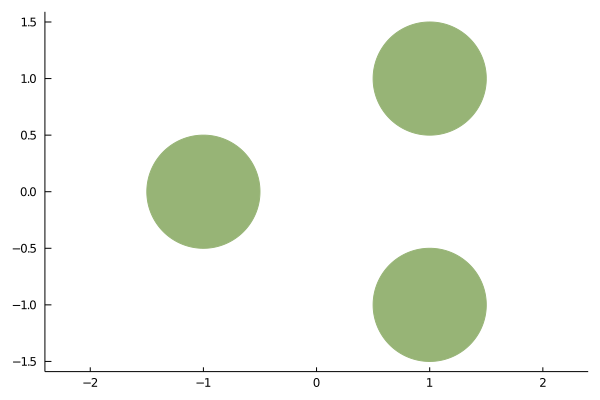

In [16]:
plot(bl)

#### Collect the inertial coordinates body Lagrange points into a single structure

In [30]:
X = VectorData(collect(bl));

### Now set up the system

Set up the state vector and constraint force vector for a static body

In [18]:
sys = NavierStokes(Re,Δx,xlim,ylim,Δt,U∞ = U∞, X̃ = X,isstore=true)

Navier-Stokes system on a grid of size 616 x 416

In [19]:
w₀ = Nodes(Dual,size(sys));
f = VectorData(X);
xg, yg = coordinates(w₀,dx=Δx,I0=origin(sys))

(-2.075:0.01:4.075, -2.075:0.01:2.075)

Add a point force to perturb the wake

In [33]:
x0 = (0.0,0.0)
A = 10.0
t0 = 2.0
sigt = 1.0
wf = PointForce(w₀,x0,A,t0,sigt,sys)

Transient point force applied on the Nodes{Dual,616,416,Float64,Array{Float64,2}} field.
   strength = 10.0
   location = [0.0, 0.0]
   central time = 2.0
   half-interval = 1.0


Set up the integrator here. This part is a bit slow.

In [21]:
plan_intfact(t,u) = CartesianGrids.plan_intfact(t,u,sys)
plan_constraints(u,t) = ConstrainedSystems.plan_constraints(u,t,sys)
r₁(u,t) = ConstrainedSystems.r₁(u,t,sys) + wf(t)
r₂(u,t) = ConstrainedSystems.r₂(u,t,sys)


@time solver = IFHERK(w₀,f,sys.Δt,plan_intfact,plan_constraints,(r₁,r₂),rk=ConstrainedSystems.RK31)

 52.482764 seconds (20.41 M allocations: 61.029 GiB, 3.76% gc time)


Order-3 IF-HERK integrator with
   State of type Nodes{Dual,616,416,Float64,Array{Float64,2}}
   Force of type VectorData{627,Float64,Array{Float64,1}}
   Time step size 0.005


Initialize the state vector and the history vectors

In [22]:
t = 0.0
u = zero(w₀)

# Rate at which to store field data
tsample = 0.2

# Field data storage plan
S = StorePlan(tsample,"state"=>u,"time"=>t)
data_history = initialize_storage(S)

# Force data storage plan, stored every time step
F = StorePlan(timestep(sys),"f1x"=>sum(f.u,bl,1),"f1y"=>sum(f.v,bl,1),
                            "f2x"=>sum(f.u,bl,2),"f2y"=>sum(f.v,bl,2),
                            "f3x"=>sum(f.u,bl,3),"f3y"=>sum(f.v,bl,3),"time"=>t)
force_history = initialize_storage(F)
nothing

### Advance the system!

Set the time range to integrate over.

In [23]:
tsim = 1.0;

Note that you can simply run the next cell repeatedly in order to extend your simulation

In [24]:
for ti in timerange(tsim,sys)
    global t, u, f = solver(t,u)
    
    fds = force(f,sys)
    
    store_data!(data_history,t,S,"state" => u, "time" => t)
    store_data!(force_history,t,F,"f1x" => sum(fds.u,bl,1),"f1y" => sum(fds.v,bl,1),
                                  "f2x" => sum(fds.u,bl,2),"f2y" => sum(fds.v,bl,2),
                                  "f3x" => sum(fds.u,bl,3),"f3y" => sum(fds.v,bl,3),"time" => t)
    
end
println("solution completed through time t = ",t)

solution completed through time t = 1.0000000000000007


#### Plotting

Basic plot

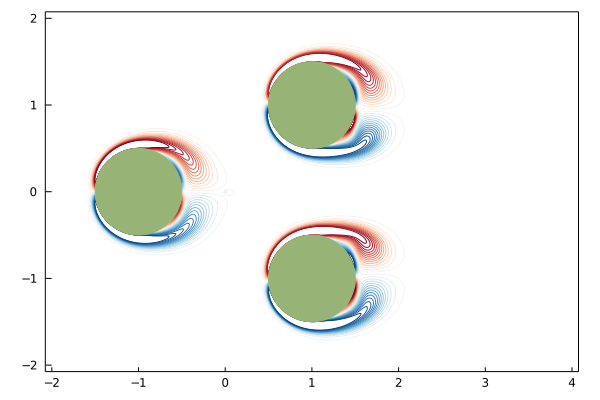

In [25]:
plot(vorticity(data_history["state"][end],sys),sys,levels=range(-10,10,length=30), color = :RdBu,clim=(-10,10))
plot!(bl)

Make a movie

┌ Info: Saved animation to 
│   fn = /home/sinan/Documents/turbulence/ViscousFlow.jl/examples/tmp.gif
└ @ Plots /home/sinan/.julia/packages/Plots/vsE7b/src/animation.jl:104


Plots.AnimatedGif("/home/sinan/Documents/turbulence/ViscousFlow.jl/examples/tmp.gif")
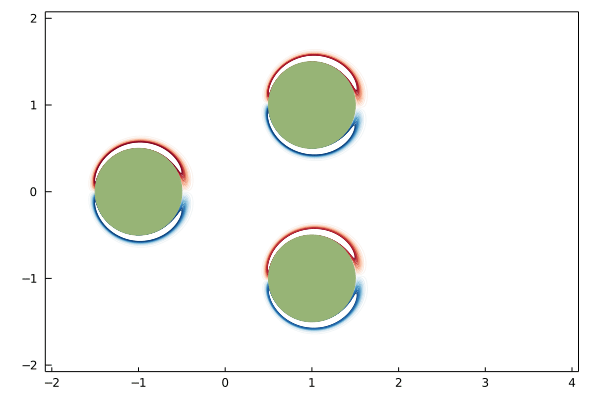

In [26]:
@gif for i = 1:length(data_history["state"])
    plot(vorticity(data_history["state"][i],sys),sys,levels=range(-10,10,length=30), color = :RdBu,clim=(-10,10))
    plot!(bl)
end

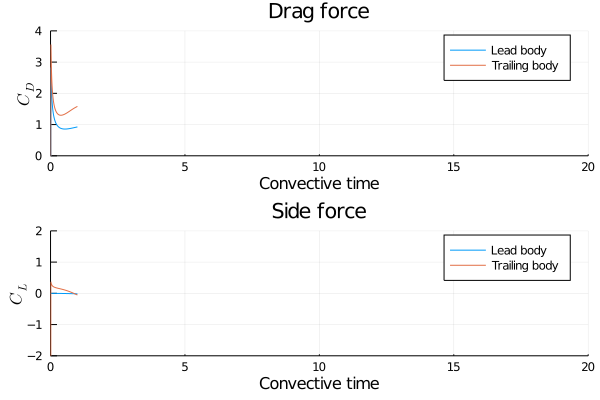

In [27]:
plt = plot(layout = (2,1), size = (600, 400))
plot!(plt[2],force_history["time"],2*force_history["f1y"],xlim=(0,20),ylim=(-2,2),xlabel="Convective time",ylabel="\$C_L\$",label="Lead body",title="Side force")
plot!(plt[1],force_history["time"],2*force_history["f1x"],xlim=(0,20),ylim=(0,4),xlabel="Convective time",ylabel="\$C_D\$",label="Lead body",title="Drag force")
plot!(plt[2],force_history["time"],2*force_history["f2y"],xlim=(0,20),ylim=(-2,2),xlabel="Convective time",ylabel="\$C_L\$",label="Trailing body")
plot!(plt[1],force_history["time"],2*force_history["f2x"],xlim=(0,20),ylim=(0,4),xlabel="Convective time",ylabel="\$C_D\$",label="Trailing body")
plt

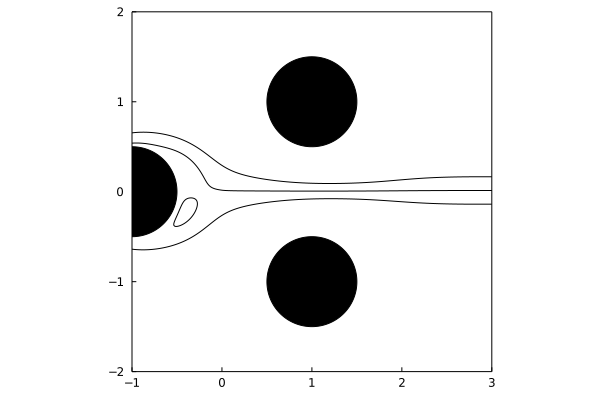

In [28]:
plot(streamfunction(data_history["state"][end],sys),sys,levels=range(-2,2,length=31), color = :black,clim=(-0.25,0.25),xlim=(-1,3),ylim=(-2,2))
plot!(bl,fillcolor=:black,linecolor=:black)